11 주차 위클리 퀴즈
# YOLO

In [39]:
# from google.colab import drive
# drive.mount('/content/drive')

#### 1. 라이브러리 불러오기

In [40]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [41]:
base_dir = 'data/yolo/yolo_dataset/'

#### 2.train_solution_bounding_boxes.csv불러와서 확인해 볼것

In [42]:
img_info = pd.read_csv(base_dir + '/train_solution_bounding_boxes.csv')
img_info.head()

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422


#### 3. Train_images에서 5장 불러와서 확인해 볼것

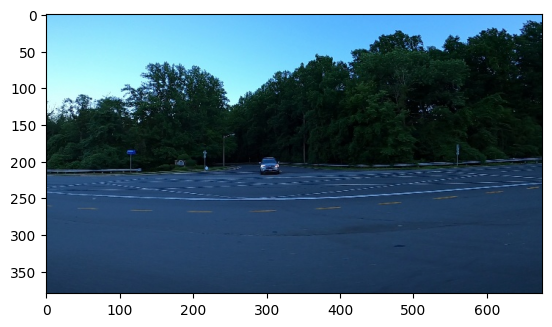

In [43]:
# img
dir = base_dir + '/training_images'
for i in range(1):
  img = cv2.imread(dir + '/' + img_info['image'][i])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()

#### 4. yolo 구현 코드는 제공하였지만 coco.names와 cfg에 무엇이있는지 꼭 확인할것

In [44]:
net = cv2.dnn.readNet(base_dir + "/yolov3.weights",base_dir + "/yolov3.cfg")
classes = []
with open(base_dir + "/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

layer_names = net.getLayerNames()
print("레이어 명:", layer_names)

unconnected_out_layers = net.getUnconnectedOutLayers()
print("Unconnected Out Layers:", unconnected_out_layers)

if len(unconnected_out_layers.shape) == 1:
    output_layers = [layer_names[i - 1] for i in unconnected_out_layers]
else:
    output_layers = [layer_names[i[0] - 1] for i in unconnected_out_layers]

print("Output Layers:", output_layers)

레이어 명: ('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 

In [45]:
# 클래스 명 (COCO NAMES)
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [46]:
# 레이머명 (CFG)
print(net.getLayerNames())

('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'leaky_

#### 여기서 부터는 opencv 공식문서 참조하면서 만들어 볼것
https://docs.opencv.org/4.x/d6/d0f/group__dnn.html

#### 5. 이미지 한장을 불러와 cv2.cvtColor를 이용해 cv2.COLOR_BGR2RGB로 변환 후 height, width, channels에 넣어주기

In [47]:
img = cv2.imread(dir + '/' + img_info['image'][20])

In [48]:
# cv2.COLOR_BGR2RGB로 변환 후 height width channels 넣어주기
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height, width, channels = img.shape


In [49]:
height, width, channels

(380, 676, 3)

#### 6. 이미지를 cv2.dnn.blobFromImage이용하여 blob이미지로 변경
        스케일 팩터는 (1/256)
        이미지 크기는 416,416
        평균값은 빼지 않기(0,0,0)
        swapRB는 True
        crop = false
        

In [50]:
# 폴더 내의 모든 이미지 처리하기

imgs = {}
for id in (img_info['image']):
    img = cv2.imread(dir + '/' + id)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs[id] = img

imgs[img_info['image'][0]]

array([[[128, 211, 255],
        [127, 210, 254],
        [127, 210, 254],
        ...,
        [101, 184, 252],
        [100, 183, 251],
        [ 99, 182, 250]],

       [[128, 211, 255],
        [128, 211, 255],
        [127, 210, 254],
        ...,
        [100, 183, 251],
        [102, 182, 253],
        [100, 183, 251]],

       [[129, 212, 254],
        [129, 212, 254],
        [128, 211, 253],
        ...,
        [103, 183, 254],
        [104, 182, 255],
        [103, 183, 254]],

       ...,

       [[ 26,  50,  78],
        [ 28,  52,  80],
        [ 27,  51,  79],
        ...,
        [ 21,  43,  67],
        [ 21,  43,  67],
        [ 21,  43,  67]],

       [[ 24,  47,  78],
        [ 27,  50,  81],
        [ 27,  51,  79],
        ...,
        [ 21,  43,  67],
        [ 21,  43,  67],
        [ 21,  43,  67]],

       [[ 25,  48,  79],
        [ 28,  51,  82],
        [ 28,  52,  80],
        ...,
        [ 20,  42,  66],
        [ 20,  42,  66],
        [ 20,  42,  66]]

In [51]:
blob = cv2.dnn.blobFromImage(imgs[img_info['image'][0]], 1/256, (416,416), (0,0,0), True, False)

#### 7. 전처리된 이미지 블롭(blob)을 신경망의 입력으로 설정하고, outputlayers에서는 신경망의 forward로 수행

In [52]:
net.setInput(blob)

outs = net.forward(output_layers)

#### 8. 신경망의 출력을 순회하여 신뢰도가 0.5 이상인 객체를 검출하고, 각 객체의 클래스 ID, 신뢰도, 그리고 이미지 내에서의 경계 상자 좌표를 계산하여 리스트에 저장합니다

In [53]:
confidance_list = []
for i in outs:
    for j in i:
        axies = j[:5]
        is_there = j[4]
        predicted = j[5:]
        if is_there > 0.5:
            confidance_list.append([axies, is_there, classes[predicted.argmax()]])

In [54]:
confidance_list

[[array([0.45077786, 0.5357855 , 0.03994535, 0.05000944, 0.7378067 ],
        dtype=float32),
  0.7378067,
  'car'],
 [array([0.45208535, 0.54568166, 0.04638144, 0.05622245, 0.9622441 ],
        dtype=float32),
  0.9622441,
  'car']]

#### 9. cv2.dnn.NMSBoxes에 경계 상자와 신뢰도를 사용하고, 겹치는 경계 상자 중에서 가장 신뢰도가 높은 것을 선택하여 인덱스를 반환합니다.

In [55]:
def convert_to_xyxy(boxes, img_width, img_height):
    converted_boxes = []
    for box in boxes:
        x_center, y_center, width, height, _ = box
        # 상대 좌표를 픽셀 좌표로 변환
        x_center = x_center * img_width
        y_center = y_center * img_height
        width = width * img_width
        height = height * img_height

        # 좌상단과 우하단 좌표 계산
        x1 = int(x_center - width  / 2)
        y1 = int(y_center - height / 2)
        x2 = int(x_center + width  / 2)
        y2 = int(y_center + height  / 2)

        converted_boxes.append([x1, y1, x2, y2])

    return np.array(converted_boxes, dtype=np.int32)

In [56]:
boxes = [confidance_list[0][0], confidance_list[1][0]]
scores = [confidance_list[0][1], confidance_list[1][1]]

In [57]:
boxes_xyxy = convert_to_xyxy(boxes, width, height)

In [58]:
imgindex = cv2.dnn.NMSBoxes(boxes_xyxy.tolist(), scores, 0.5, 0.4)
imgindex = int(imgindex)
imgindex

/tmp/ipykernel_712/1033902206.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  imgindex = int(imgindex)


1

#### 10. 해당 객체의 클래스와 신뢰도를 이미지에 표시하여 출력

In [59]:
boxes_xyxy

array([[291, 194, 318, 213],
       [289, 196, 321, 218]], dtype=int32)

In [60]:
img.shape

(380, 676, 3)

In [61]:
img = imgs[img_info['image'][0]].copy()

In [62]:
import cv2
import matplotlib.pyplot as plt

# 이미지에 경계 상자와 신뢰도 표시
box = boxes_xyxy[imgindex]
x1, y1, x2, y2 = box
confidence = boxes[int(imgindex)][-1]  # 신뢰도

# 경계 상자 그리기
cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 255), 1)

# 신뢰도 텍스트 추가
text = f'{confidence:.2f}'
cv2.putText(img, text, (x1, y1 - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)


array([[[128, 211, 255],
        [127, 210, 254],
        [127, 210, 254],
        ...,
        [101, 184, 252],
        [100, 183, 251],
        [ 99, 182, 250]],

       [[128, 211, 255],
        [128, 211, 255],
        [127, 210, 254],
        ...,
        [100, 183, 251],
        [102, 182, 253],
        [100, 183, 251]],

       [[129, 212, 254],
        [129, 212, 254],
        [128, 211, 253],
        ...,
        [103, 183, 254],
        [104, 182, 255],
        [103, 183, 254]],

       ...,

       [[ 26,  50,  78],
        [ 28,  52,  80],
        [ 27,  51,  79],
        ...,
        [ 21,  43,  67],
        [ 21,  43,  67],
        [ 21,  43,  67]],

       [[ 24,  47,  78],
        [ 27,  50,  81],
        [ 27,  51,  79],
        ...,
        [ 21,  43,  67],
        [ 21,  43,  67],
        [ 21,  43,  67]],

       [[ 25,  48,  79],
        [ 28,  51,  82],
        [ 28,  52,  80],
        ...,
        [ 20,  42,  66],
        [ 20,  42,  66],
        [ 20,  42,  66]]

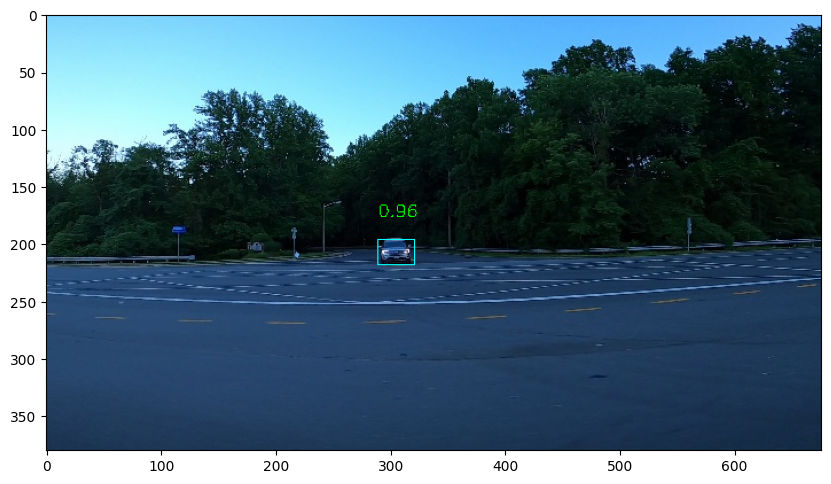

In [63]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(img)
plt.show()

#### 11. 지금까지 위에서는 이미지 한장을 하였다, 이제는 모든 이미지를 읽고 전처리한 후 YOLO 모델에 입력으로 설정하고, 신경망의 출력을 통해 신뢰도가 0.5 이상인 객체를 탐지하여 그 경계 상자, 클래스 ID, 신뢰도를 계산하고, 비cv2.dnn.NMSBoxes로 최종 경계 상자를 결정한 뒤 이를 이미지에 그려 시각화하는 함수를 만들것

In [64]:
print(type(imgs))
for i in imgs:
    print(i)
    break

<class 'dict'>
vid_4_1000.jpg


In [65]:
all_imgs = [i for i in imgs.values()]
all_imgs = all_imgs[:40] # 메모리 부족으로 축소

blobs = cv2.dnn.blobFromImages(all_imgs, 1/256, (416,416), (0,0,0), True, False)

In [66]:
net.setInput(blobs)

outs = net.forward(output_layers)

In [67]:
# yolo_82, yolo_94, yolo_106 = 0,1,2

In [68]:
outs[0].shape

(40, 507, 85)

In [69]:
confidance_list = []
for i in outs[1]:
    each_img_confidance_list = []
    for j in i:
        axies = j[:4]
        is_there = j[4]
        predicted = j[5:]
        if is_there > 0.5:
            each_img_confidance_list.append([axies, is_there, classes[predicted.argmax()]])
    confidance_list.append(each_img_confidance_list)


In [70]:
### 인덱스 입력하면 사진과 시각화
def convert_to_xyxy_2(boxes, img_width, img_height):
    converted_boxes = []
    for box in boxes:
        x_center, y_center, width, height = box
        # 상대 좌표를 픽셀 좌표로 변환
        x_center = x_center * img_width
        y_center = y_center * img_height
        width = width * img_width
        height = height * img_height

        # 좌상단과 우하단 좌표 계산
        x1 = int(x_center - width  / 2)
        y1 = int(y_center - height / 2)
        x2 = int(x_center + width  / 2)
        y2 = int(y_center + height  / 2)

        converted_boxes.append([x1, y1, x2, y2])

    return np.array(converted_boxes, dtype=np.int32)

def predict_yolo(idx):
    img = all_imgs[idx].copy()
    boxes = []
    score = []
    for i in confidance_list[idx]:
        boxes.append(i[0])
        score.append(i[1])

    boxes_xyxy = convert_to_xyxy_2(boxes, width, height)
    imgindex = cv2.dnn.NMSBoxes(boxes_xyxy.tolist(), score, 0.5, 0.4)
    imgindex = int(imgindex)
    print()
    # 이미지에 경계 상자와 신뢰도 표시
    box = boxes_xyxy[imgindex]
    x1, y1, x2, y2 = box
    confidence = float(score[0])  # 신뢰도

    # 경계 상자 그리기
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 255), 1)

    # 신뢰도 텍스트 추가
    text = f'{confidence:.2f}'
    cv2.putText(img, text, (x1, y1 - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.imshow(img)
    plt.show()


/tmp/ipykernel_712/480278231.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  imgindex = int(imgindex)


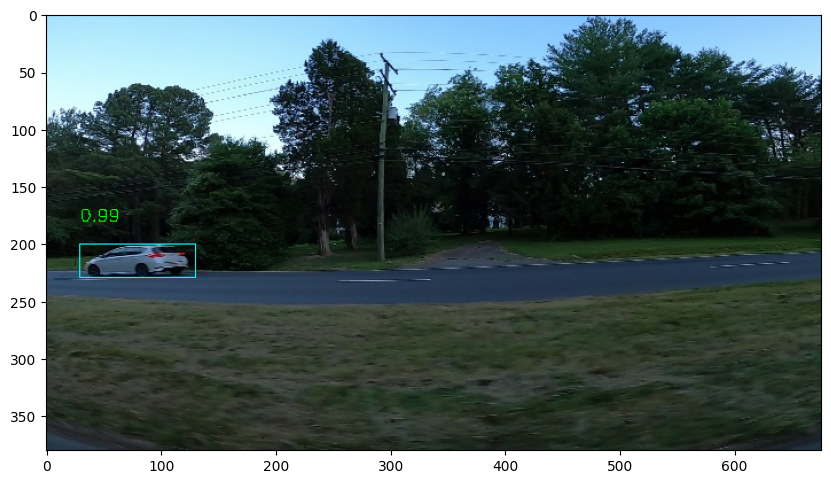

In [71]:
predict_yolo(4)

#### 12. 테스트셋에서 무작위로 하나를 선택한 후, predict_yolo 함수를 사용하여 해당 이미지에서 객체를 탐지하고 시각화 할것

In [72]:
import glob
import random


In [73]:
### 인덱스 입력하면 사진과 시각화
def convert_to_xyxy_2(boxes, img_width, img_height):
    converted_boxes = []
    for box in boxes:
        x_center, y_center, width, height = box
        # 상대 좌표를 픽셀 좌표로 변환
        x_center = x_center * img_width
        y_center = y_center * img_height
        width = width * img_width
        height = height * img_height

        # 좌상단과 우하단 좌표 계산
        x1 = int(x_center - width  / 2)
        y1 = int(y_center - height / 2)
        x2 = int(x_center + width  / 2)
        y2 = int(y_center + height  / 2)

        converted_boxes.append([x1, y1, x2, y2])

    return np.array(converted_boxes, dtype=np.int32)

[array([0.37821013, 0.5873978 , 0.24561259, 0.12779099], dtype=float32), array([0.38910472, 0.5884638 , 0.24860843, 0.13361439], dtype=float32), array([0.3780583 , 0.5935112 , 0.23313445, 0.11784891], dtype=float32), array([0.38732493, 0.59382915, 0.22209582, 0.11722049], dtype=float32)]
[2]


/tmp/ipykernel_712/4220919549.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  imgindex = int(imgindex)


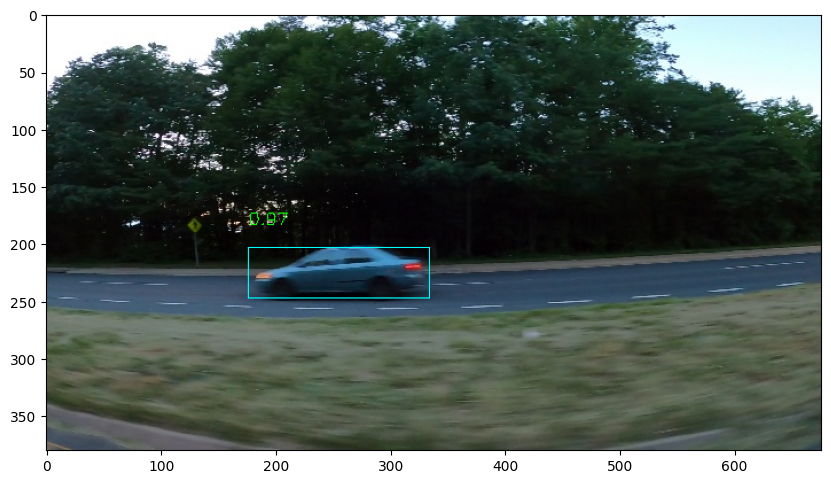

In [80]:
paths = glob.glob(base_dir + '/testing_images/*.jpg')

select_one_img_from_dir = random.choice(paths)
img = cv2.imread(select_one_img_from_dir)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blobs = cv2.dnn.blobFromImage(img, 1/256, (416,416), (0,0,0), True, False)

net.setInput(blobs)
outs = net.forward(output_layers)

each_img_confidance_list = []
for out in outs:
    for j in out:
        axies = j[:4]
        is_there = j[4]
        predicted = j[5:]
        if is_there > 0.1:
            each_img_confidance_list.append([axies, is_there, classes[predicted.argmax()]])

each_img_confidance_list

def predict_yolo(img, axis_and_confi_and_cat):
    boxes = []
    score = []
    for i in axis_and_confi_and_cat:
        boxes.append(i[0])
        score.append(i[1])
    print(boxes)
    boxes_xyxy = convert_to_xyxy_2(boxes, width, height)
    imgindex = cv2.dnn.NMSBoxes(boxes_xyxy.tolist(), score, 0.1, 0.8)

    print(imgindex)
    imgindex = int(imgindex)
    # 이미지에 경계 상자와 신뢰도 표시
    box = boxes_xyxy[imgindex]
    x1, y1, x2, y2 = box
    confidence = float(score[0])  # 신뢰도

    # 경계 상자 그리기
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 255), 1)

    # 신뢰도 텍스트 추가
    text = f'{confidence:.2f}'
    cv2.putText(img, text, (x1, y1 - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.imshow(img)
    plt.show()

predict_yolo(img, each_img_confidance_list)